In [5]:
using Pkg
Pkg.activate("./../.")
using DataFrames,PythonPlot,StatsBase,Random,Distributions,CSV
PythonPlot.svg(true)
include("./process_mm_data.jl")


  Activating project at `~/Dartmouth College Dropbox/Ethan Levien/RESEARCH/ACTIVE/cell_size/single-cell-size-data`
    CondaPkg Found dependencies: /Users/elevien/.julia/packages/PythonCall/WMWY0/CondaPkg.toml
    CondaPkg Found dependencies: /Users/elevien/.julia/packages/PythonPlot/oS8x4/CondaPkg.toml
    CondaPkg Initialising pixi
             │ /Users/elevien/.julia/artifacts/d2fecc2a9fa3eac2108d3e4d9d155e6ff5dfd0b2/bin/pixi
             │ init
             │ --format pixi
             └ /Users/elevien/.julia/environments/v1.11/.CondaPkg
✔ Created /Users/elevien/.julia/environments/v1.11/.CondaPkg/pixi.toml
    CondaPkg Wrote /Users/elevien/.julia/environments/v1.11/.CondaPkg/pixi.toml
             │ [dependencies]
             │ matplotlib = ">=1"
             │ 
             │     [dependencies.python]
             │     channel = "conda-forge"
             │     build = "*cpython*"
             │     version = ">=3.8,<4"
             │ 
             │ [project]
             │ na

process_natsci_data (generic function with 1 method)

# Curr Biology 20-1099-1103 (2010)

In [6]:
df_cb = process_currbiol_data()

hereProcessing experiment: E. coli B:r SJ108 and SJ119
  Processing date: 20090412 SJ108
    Processing directory: xy01
      Processing file: ch0_cell0.dat (lineage 1)
      Processing file: ch1_cell0.dat (lineage 2)
      Processing file: ch2_cell0.dat (lineage 3)
      Processing file: ch3_cell0.dat (lineage 4)
    Processing directory: xy02
      Processing file: ch0_cell0.dat (lineage 5)
      Processing file: ch1_cell0.dat (lineage 6)
      Processing file: ch2_cell0.dat (lineage 7)
    Processing directory: xy03
      Processing file: ch0_cell0.dat (lineage 8)
    Processing directory: xy04
      Processing file: ch0_cell0.dat (lineage 9)
      Processing file: ch1_cell0.dat (lineage 10)
    Processing directory: xy05
      Processing file: ch0_cell0.dat (lineage 11)
      Processing file: ch1_cell0.dat (lineage 12)
      Processing file: ch2_cell0.dat (lineage 13)
      Processing file: ch3_cell0.dat (lineage 14)
    Processing directory: xy06
      Processing file: ch0_cell0.d

Row,size,y,time_units,cell,lineage,channel,experiment,info
,Float64,Float64,Int64,Int64,Int64,Int64,String,String
1,65.1018,-0.149256,0,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
2,67.0917,-0.119148,1,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
3,73.0639,-0.0338735,2,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
4,71.0222,-0.0622154,3,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
5,75.0964,-0.00643531,4,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
6,80.1511,0.0587057,5,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
7,80.0802,0.0578207,6,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
8,84.1251,0.107097,7,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,
9,85.0518,0.118053,8,1,1,0,E. coli B:r SJ108 and SJ119_20090412 SJ108,


In [8]:
experiments = unique(df_cb.experiment)
d3 = df_cb[(df_cb.experiment .== experiments[3]),:]

Base.summarysize(d3)/1e6

24.674731

In [10]:
CSV.write(joinpath("./../data/","WRB2010.csv"),d3)

"./../data/WRB2010.csv"

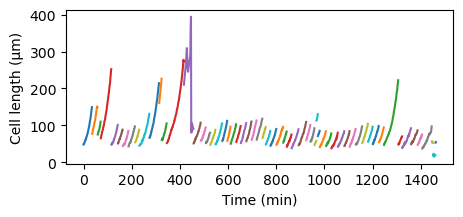

In [13]:
d = d3[d3.lineage .== 1,:]
fig, ax= subplots(figsize=(5,2))
for cell in unique(d.cell)
    dcell = d[d.cell .== cell,:]
    ax.plot(dcell.time_units,dcell.size)
end
ax.set_xlabel("Time (min)")
ax.set_ylabel("Cell length (μm)")
fig


# Nature Scientific Data 170036 (2017)

In [14]:
df_nsd = process_natsci_data()
CSV.write(joinpath("./../data/","TPP2017.csv"),df_nsd)

Processing NatSci data...
Processing temperature condition: MC4100_27C
  Processing file: xy01_01.txt (lineage 1)
  Processing file: xy01_02.txt (lineage 2)
  Processing file: xy01_05.txt (lineage 3)
  Processing file: xy02_02.txt (lineage 4)
  Processing file: xy03_01.txt (lineage 5)
  Processing file: xy03_04.txt (lineage 6)
  Processing file: xy03_06.txt (lineage 7)
  Processing file: xy03_08.txt (lineage 8)
  Processing file: xy04_04.txt (lineage 9)
  Processing file: xy05_01.txt (lineage 10)
  Processing file: xy05_03.txt (lineage 11)
  Processing file: xy05_04.txt (lineage 12)
  Processing file: xy05_05.txt (lineage 13)
  Processing file: xy05_06.txt (lineage 14)
  Processing file: xy06_02.txt (lineage 15)
  Processing file: xy06_04.txt (lineage 16)
  Processing file: xy07_01.txt (lineage 17)
  Processing file: xy07_03.txt (lineage 18)
  Processing file: xy07_07.txt (lineage 19)
  Processing file: xy07_08.txt (lineage 20)
  Processing file: xy08_01.txt (lineage 21)
  Processing f

"./../data/TPP2017.csv"

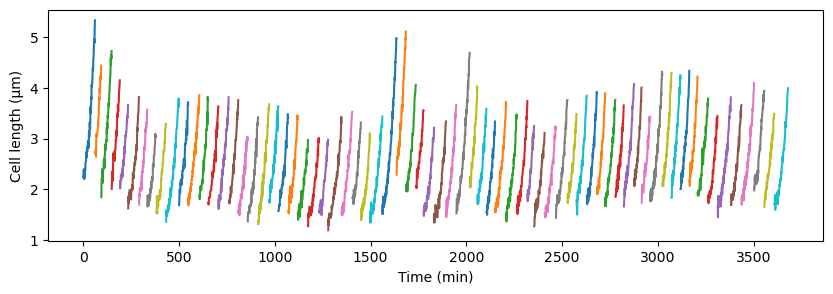

In [15]:
experiments = unique(df_nsd.experiment)
d = df_nsd[(df_nsd.experiment .== experiments[1]) .& (df_nsd.lineage .== 10),:]

fig, ax= subplots(figsize=(10,3))
for cell in unique(d.cell)
    dcell = d[d.cell .== cell,:]
    ax.plot(dcell.time_units,dcell.size)
end
ax.set_xlabel("Time (min)")
ax.set_ylabel("Cell length (μm)")
fig

# SMR data